## Assign Modularity

In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt

### Load Username

In [16]:
df = pd.read_csv(os.path.join(os.pardir,os.pardir,"data","01_out","pemilu-at-kpu_id.csv"), usecols = ['text','username'])

In [17]:
def unique_username(dataframe):
    dataframe = dataframe.str.lower()
    dataframe = dataframe.drop_duplicates()
    return dataframe.tolist()

unique_list = unique_username(df['username'])

### Replace id to username and Load Gephi Modularity

In [18]:
modularity_df = pd.read_csv(os.path.join(os.pardir,os.pardir,"data","gephi","2-KCore_modularity.csv"))

In [19]:
unique_id = list(map(str, range(0,len(unique_list))))

In [20]:
modularity_df['Id'] = modularity_df['Id'].str.lstrip("'")
modularity_df['id'] = modularity_df['Id']
modularity_df['Id'] = modularity_df['Id'].replace(unique_id,unique_list)
modularity_df.rename(columns={"Id":"username"}, inplace=True)

In [21]:
username_list = modularity_df['username'].tolist()
modularity_list = modularity_df['modularity_class'].tolist()
id_list = modularity_df['id'].tolist()

## Remove Tweet outside community

In [22]:
removed_uninedexed = df
removed_uninedexed['username'] = removed_uninedexed['username'].str.lower()

In [23]:
removed_unindexed = df[df['username'].isin(username_list)]
removed_indexed = removed_unindexed.reset_index(drop=True)

## Add modularity column

In [24]:
removed_indexed['modularity'] = removed_indexed['username']
removed_indexed['node_id'] = removed_indexed['username']

In [25]:
removed_indexed['modularity'] = removed_indexed['modularity'].replace(username_list, modularity_list)
removed_indexed['node_id'] = removed_indexed['node_id'].replace(username_list, id_list)

In [28]:
removed_indexed.head()

,text,username,modularity,node_id
0,Mereka itu korban yg kalah di 2014. Inget siap...,b12_7hon,4,0
1,Penomena @KPU_RI @KPU_ID tdk kuat scra lembaga...,harun_nugraha,4,1
2,ngapain pemilu ulang broo klu kita 02 sdh mena...,totonaser11,5,3
3,"Kl menerapkan ISO pasti kelar 1 minggu, ngga a...",rohmatjabbar,5,5
4,Hayooo @KPU_ID @bawaslu_RI simak baik2 orasi k...,use_will,3,6


In [29]:
# Export to csv
# removed_indexed.to_csv(os.path.join(os.pardir,os.pardir,"data","04_out","2-KCore-tweet.csv"), index=False)

## In Degree Distribution
http://www.indiana.edu/~pcl/rgoldsto/courses/social%20networks2.pdf  
Proving Power Law distribution properties in networks

In [2]:
df = pd.read_csv(os.path.join(os.pardir,os.pardir,"data","gephi","InDegreeDistribution.csv"))

In [3]:
power_law = df.groupby("indegree").agg("count")

In [4]:
# Proportion. Frequency / Total
power_law["Power Law"] = power_law["Id"].div(len(df.index))
power_law["sum"] = power_law["Power Law"].cumsum().mul(100)
power_law.head()

,Id,Power Law,sum
indegree,,,
1,1211919,0.798208,79.820786
2,139180,0.091668,88.987618
3,46289,0.030487,92.036356
4,24104,0.015876,93.623921
5,15116,0.009956,94.619509


## Line Plot

In [13]:
plot = power_law[["Power Law"]].plot(xlim=(-10,250),
                grid=True,
                title="Distribusi Power Law")
plot.set_xlabel("Derajat")
plot.set_ylabel("Frekuensi/total")
plt.show()
# plt.savefig(os.path.join(os.pardir,os.pardir,"data","04_out/longtail"),dpi=300)

## Pie Chart

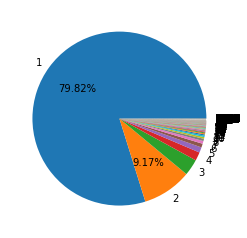

In [6]:
# https://stackoverflow.com/questions/21572870/matplotlib-percent-label-position-in-pie-chart
def my_autopct(pct):
    return ('%.2f%%' % pct) if pct >= 5 else ''

plt.pie(power_law["Power Law"], labels=power_law.index, autopct=my_autopct)
plt.show()

## Scatter Plot

In [7]:
power_law.reset_index(inplace=True)

In [8]:
power_law.head()

,indegree,Id,Power Law,sum
0,1,1211919,0.798208,79.820786
1,2,139180,0.091668,88.987618
2,3,46289,0.030487,92.036356
3,4,24104,0.015876,93.623921
4,5,15116,0.009956,94.619509


In [14]:
plot = power_law.plot.scatter(#xlim=(-10,100),
                x="indegree",
                y="Power Law",
                grid=True,
                title="Distribusi Power Law",
                loglog=True,
                s=[2]
                )
plot.set_xlabel("Log derajat")
plot.set_ylabel("Log frekuensi/total")
# plt.show()
plt.savefig(os.path.join(os.pardir,os.pardir,"data","04_out","longtail_log"),dpi=300)